# Capstone drive thru classifier

# This project is a simple version of how to identify tagged features of real estate based on google satalite image 

## We identify pretagged building type from dataset coming from forum crawlers

## This code beggins after the dataset has been predownloaded and saved so that we dont have to redo the datapul

In [51]:
import requests
import pandas as pd

import os
import numpy as np
import skimage
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data, io, filters, color, exposure


from numpy import array
import pickle  

import keras
##from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
##import tensorflow as tf


 

## Importing the data

In [52]:
##pkl_file = open('all_images_1000.pkl', 'rb')  
##pkl_file = open('file_names_1000.pkl', 'rb')
pkl_file = open('sb_buildings_drivein_geocoded_img.pkl', 'rb')  
all_images= pickle.load(pkl_file)
pkl_file.close()  

pkl_file = open('sb_buildings_drivein_geocoded_tag.pkl', 'rb') 
file_names= pickle.load(pkl_file)
pkl_file.close()  


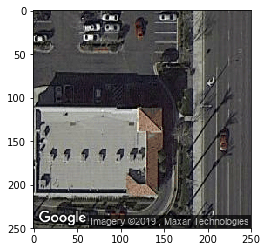

In [53]:
plt.imshow(all_images[6])
##print(all_images_gray[1])

## Preping the data and spliting into test and validation

In [54]:
all_image_gray=[]
for image in all_images:
    all_image_gray.append(color.rgb2gray(image))





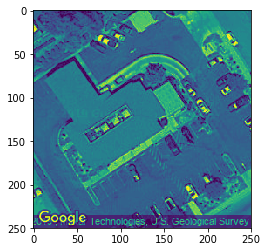

In [55]:
plt.imshow(all_image_gray[7])
##print(all_images_gray_array[1])

In [56]:
all_images_gray_array=array(all_image_gray)   

In [58]:
file_names_array=array(file_names) 

In [59]:
file_names_array[7]

'Yes'

In [60]:
pd.value_counts(pd.Series(file_names_array))

No     597
Yes    577
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_images_gray_array, file_names_array, test_size=0.3)


In [12]:
img_rows, img_cols = 250, 250
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
##x_train /= 255
##x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (821, 250, 250, 1)
821 train samples
353 test samples


print(y_test)

In [13]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train= encoder.fit_transform(y_train)
y_train=np.hstack((y_train, 1 - y_train))
y_test= encoder.fit_transform(y_test)
y_test=np.hstack((y_test, 1 - y_test))
print(y_train)

[[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


print(y_test)

# Training the Original Shallow Model

In [14]:
batch_size =20
##batch_size = 5
num_classes = 2
##epochs = 10
epochs = 10


model = Sequential()
model.add(Conv2D(32, kernel_size=(10, 10),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(10, 10),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(10, 10)))
model.add(Dropout(0.25))


model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))



model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 241, 241, 32)      3232      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 232, 232, 32)      102432    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 16)          0         
__________

In [16]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 821 samples, validate on 353 samples
Epoch 1/10
821/821 [==============================] - 77s 94ms/step - loss: 0.7008 - acc: 0.5128 - val_loss: 0.6929 - val_acc: 0.5127
Epoch 2/10
821/821 [==============================] - 51s 62ms/step - loss: 0.6844 - acc: 0.5432 - val_loss: 0.9161 - val_acc: 0.5099
Epoch 3/10
821/821 [==============================] - 51s 62ms/step - loss: 0.6824 - acc: 0.6054 - val_loss: 0.6933 - val_acc: 0.5297
Epoch 4/10
821/821 [==============================] - 51s 62ms/step - loss: 0.6595 - acc: 0.6175 - val_loss: 0.6625 - val_acc: 0.6544
Epoch 5/10
821/821 [==============================] - 51s 62ms/step - loss: 0.6310 - acc: 0.6480 - val_loss: 0.6977 - val_acc: 0.5949
Epoch 6/10
821/821 [==============================] - 51s 62ms/step - loss: 0.6027 - acc: 0.6967 - val_loss: 0.9292 - val_acc: 0.5411
Epoch 7/10
821/821 [==============================] - 51s 62ms/step - loss: 0.6131 - acc: 0.6784 - val_loss: 0.6098 - val_acc: 0.6771
Epoch 8/10
821/8

Test loss: 0.6258831125480933
Test accuracy: 0.6855524079320113


Text(0.5, 1.0, 'Loss Curves')

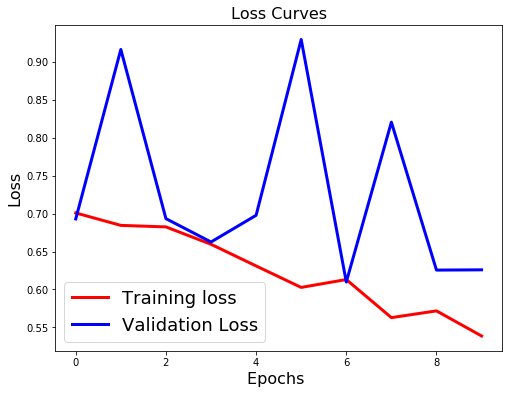

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

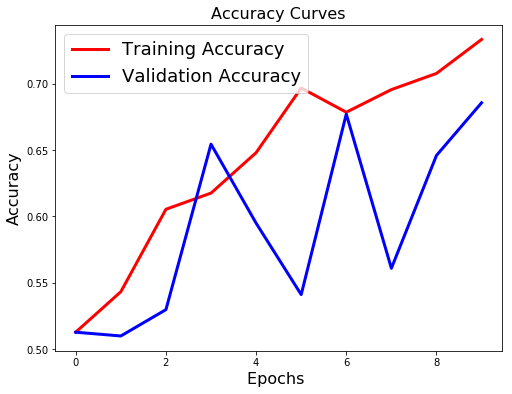

In [18]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [19]:
predicted_classes = model.predict_classes(x_test)
y_test_list=[]
for i in range(len(y_test)):
    ##print((y_test[i]))
    ##print((y_test[i][0]))
    if ((y_test[i][0])==1):
        y_test_list.append(0)
    if ((y_test[i][1])==1):
        y_test_list.append(1)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_list,predicted_classes)


array([[141,  32],
       [ 79, 101]], dtype=int64)

# Running the model with Augmented data

In [20]:
x_train_rot=[]
y_train_rot=[]
for i in range(len(x_train)):
    x_train_rot.append(x_train[i])
    y_train_rot.append(y_train[i])
               
    x_train_rot.append(x_train[i][::-1,:,:])
    y_train_rot.append(y_train[i])
    
    x_train_rot.append(x_train[i][:,::-1,:])
    y_train_rot.append(y_train[i])
               
    x_train_rot.append(x_train[i].transpose([1,0,2]))
    y_train_rot.append(y_train[i])
x_train_rot = np.array(x_train_rot,dtype='float32')
y_train_rot = np.array(y_train_rot,dtype='float32')
len(x_train_rot)

3284

In [42]:
history = model.fit(x_train_rot, y_train_rot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 3284 samples, validate on 353 samples
Epoch 1/30
3284/3284 [==============================] - 179s 55ms/step - loss: 0.5985 - acc: 0.6961 - val_loss: 0.5877 - val_acc: 0.6941
Epoch 2/30
3284/3284 [==============================] - 179s 54ms/step - loss: 0.5443 - acc: 0.7235 - val_loss: 0.7071 - val_acc: 0.6374
Epoch 3/30
3284/3284 [==============================] - 179s 55ms/step - loss: 0.5346 - acc: 0.7299 - val_loss: 0.5394 - val_acc: 0.7167
Epoch 4/30
3284/3284 [==============================] - 179s 55ms/step - loss: 0.5228 - acc: 0.7448 - val_loss: 0.5732 - val_acc: 0.7082
Epoch 5/30
3284/3284 [==============================] - 179s 55ms/step - loss: 0.5094 - acc: 0.7521 - val_loss: 0.6054 - val_acc: 0.6601
Epoch 6/30
3284/3284 [==============================] - 179s 55ms/step - loss: 0.4900 - acc: 0.7722 - val_loss: 0.5943 - val_acc: 0.6572
Epoch 7/30
3284/3284 [==============================] - 179s 54ms/step - loss: 0.4757 - acc: 0.7738 - val_loss: 0.6489 - val_acc: 0

Test loss: 0.6117712751706329
Test accuracy: 0.7252124645892352


array([[  0,   0,   0],
       [140,  36,   0],
       [ 61, 116,   0]], dtype=int64)

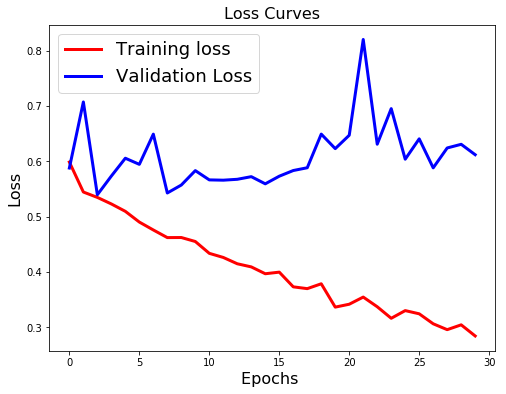

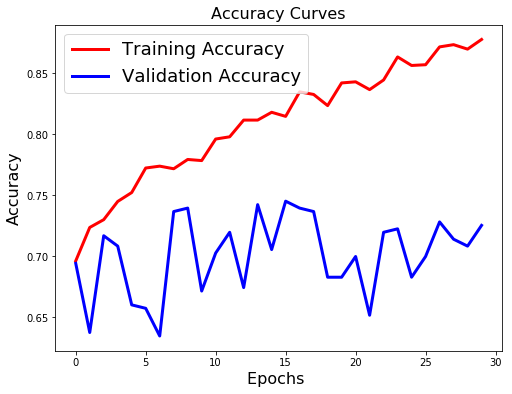

In [43]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
predicted_classes = model.predict_classes(x_test)
y_test_list=[]
for i in range(len(y_test)):
    if ((y_test[i][0])==1):
        y_test_list.append(1)
    if ((y_test[i][1])==1):
        y_test_list.append(2)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_list,predicted_classes)

## Dense Model


In [33]:
batch_size = 20
num_classes = 2
epochs = 20



model = Sequential()



model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))



model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
##model.add(Dense(17, activation='sigmoid'))




model.add(Dense(num_classes, activation='sigmoid'))


# compile model
##opt = SGD(lr=0.01, momentum=0.9)
##model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])
##categorical_crossentropy

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 250, 250, 32)      320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 250, 250, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 62, 62, 128)       73856     
__________

In [34]:
history = model.fit(x_train_rot, y_train_rot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 3284 samples, validate on 353 samples
Epoch 1/20
3284/3284 [==============================] - 211s 64ms/step - loss: 8.1167 - acc: 0.4884 - val_loss: 8.0378 - val_acc: 0.4986
Epoch 2/20
3284/3284 [==============================] - 191s 58ms/step - loss: 8.2006 - acc: 0.4884 - val_loss: 8.0378 - val_acc: 0.4986
Epoch 3/20
3284/3284 [==============================] - 191s 58ms/step - loss: 8.2006 - acc: 0.4884 - val_loss: 8.0378 - val_acc: 0.4986
Epoch 4/20
3284/3284 [==============================] - 191s 58ms/step - loss: 8.2006 - acc: 0.4884 - val_loss: 8.0378 - val_acc: 0.4986
Epoch 5/20
3284/3284 [==============================] - 191s 58ms/step - loss: 8.2006 - acc: 0.4884 - val_loss: 8.0378 - val_acc: 0.4986
Epoch 6/20
3284/3284 [==============================] - 191s 58ms/step - loss: 8.2006 - acc: 0.4884 - val_loss: 8.0378 - val_acc: 0.4986
Epoch 7/20
3284/3284 [==============================] - 191s 58ms/step - loss: 8.2006 - acc: 0.4884 - val_loss: 8.0378 - val_acc: 0

Test loss: 8.03782545774565
Test accuracy: 0.4985835694050991


array([[  0,   0,   0],
       [176,   0,   0],
       [177,   0,   0]], dtype=int64)

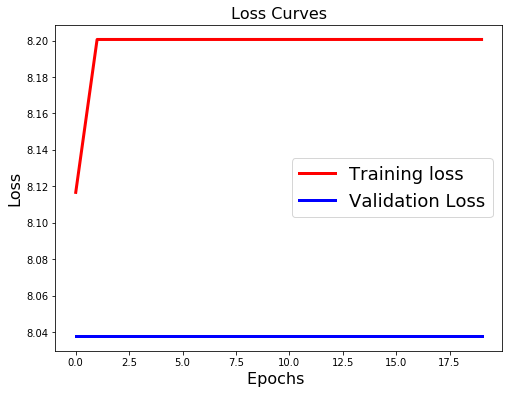

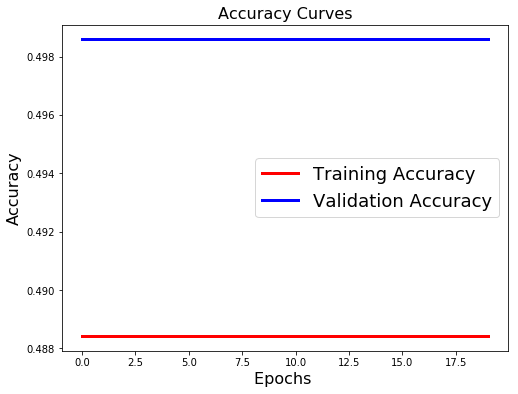

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
predicted_classes = model.predict_classes(x_test)
y_test_list=[]
for i in range(len(y_test)):
    if ((y_test[i][0])==1):
        y_test_list.append(1)
    if ((y_test[i][1])==1):
        y_test_list.append(2)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_list,predicted_classes)

# 
### FOLLOW UP MODELS AFTER YURI'S RECOMENDATIONS

In [45]:

from pandas_ml import ConfusionMatrix
def model_eval():
    score = model.evaluate(x_test, y_test, verbose=0)

    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['acc'],'r',linewidth=3.0)
    plt.plot(history.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    predicted_classes = model.predict_classes(x_test)
    y_test_list=[]
    for i in range(len(y_test)):
        if ((y_test[i][0])==1):
            y_test_list.append(1)
        if ((y_test[i][1])==1):
            y_test_list.append(2)

    from sklearn.metrics import confusion_matrix
    confusion_matrix(y_test_list,predicted_classes)
    ### got from https://pandas-ml.readthedocs.io/en/latest/conf_mat.html

    predicted_classes = model.predict_classes(x_test)
    y_test_list=[]
    for i in range(len(y_test)):
        if ((y_test[i][0])==1):
            y_test_list.append("no")
        if ((y_test[i][1])==1):
            y_test_list.append("yes")


    ##from sklearn.metrics import confusion_matrix
    ##confusion_matrix(y_test_list,predicted_classes)
    predicted_classes_list=[]
    for label in predicted_classes:

        if (label==0):
            predicted_classes_list.append("no")
        if (label==1):
            predicted_classes_list.append("yes")

    confusion_matrix = ConfusionMatrix(y_test_list,predicted_classes_list)
    print("Confusion matrix:\n%s" % confusion_matrix)
    ##confusion_matrix.plot()
    ##confusion_matrix.print_stats()

In [47]:
batch_size =20
##batch_size = 5
num_classes = 2
##epochs = 10
epochs =50


model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(4, 4),activation='relu'))

model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(8, 8), activation='relu'))

model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(16, 16), activation='relu'))

model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(32, 32),  activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))






model.add(Flatten())
model.add(Dense(28, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='sigmoid'))



model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 249, 249, 32)      160       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 246, 246, 32)      16416     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 61, 61, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 54, 54, 32)        65568     
_________________________________________________________________
dropout_38 (Dropout)         (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 39, 39, 32)        262176    
__________

Train on 3284 samples, validate on 353 samples
Epoch 1/50
3284/3284 [==============================] - 125s 38ms/step - loss: 0.6959 - acc: 0.5265 - val_loss: 0.6931 - val_acc: 0.5099
Epoch 2/50
3284/3284 [==============================] - 122s 37ms/step - loss: 0.6506 - acc: 0.6153 - val_loss: 0.7158 - val_acc: 0.5722
Epoch 3/50
3284/3284 [==============================] - 122s 37ms/step - loss: 0.5967 - acc: 0.6751 - val_loss: 0.6318 - val_acc: 0.6303
Epoch 4/50
3284/3284 [==============================] - 122s 37ms/step - loss: 0.5898 - acc: 0.6941 - val_loss: 0.7950 - val_acc: 0.5935
Epoch 5/50
3284/3284 [==============================] - 122s 37ms/step - loss: 0.5809 - acc: 0.6917 - val_loss: 0.6546 - val_acc: 0.5878
Epoch 6/50
3284/3284 [==============================] - 122s 37ms/step - loss: 0.5723 - acc: 0.7034 - val_loss: 0.6987 - val_acc: 0.6161
Epoch 7/50
3284/3284 [==============================] - 122s 37ms/step - loss: 0.5591 - acc: 0.7110 - val_loss: 0.6417 - val_acc: 0

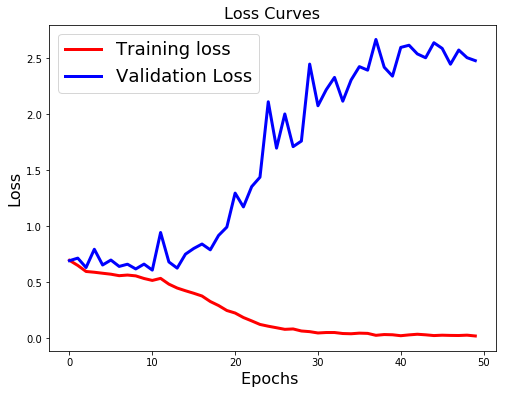

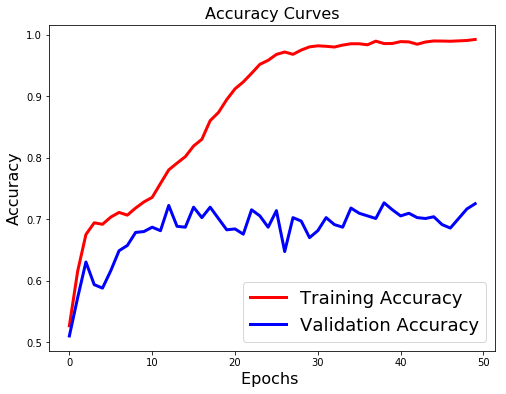

In [48]:



history = model.fit(x_train_rot, y_train_rot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
model_eval()

# Final Model 
### (Neeraj Code)

In [1]:
import requests
import pandas as pd

import os
import numpy as np
import skimage
import matplotlib.pyplot as plt
##%matplotlib inline
from skimage import data, io, filters, color, exposure


from numpy import array
import pickle  

import keras
##from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
##import tensorflow as tf

Using TensorFlow backend.


In [2]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 7C0D-FBBE

 Directory of C:\Users\taras\Desktop\UChicago\Capstone Project\geofeatures\003 model forum drive thru\starbucks

2019-11-24  10:16 AM    <DIR>          .
2019-11-24  10:16 AM    <DIR>          ..
2019-06-23  02:08 PM    <DIR>          .ipynb_checkpoints
2019-11-03  10:17 AM           466,847 00031 capstone_drivethrue_200_downloading satelite starbucks.ipynb
2019-11-24  10:16 AM           567,126 0032 capstone_drivethrue_200_classifier.ipynb
2019-11-03  10:14 AM             4,915 0032_capstone_drivethrue_200_classifier.py
2019-06-23  01:18 PM    <DIR>          img
2019-11-03  10:14 AM               466 run.sbatch
2019-11-03  10:14 AM           811,807 sb_buildings_drivein_geocoded.pkl
2019-11-03  10:14 AM        79,331,027 sb_buildings_drivein_geocoded_img.zip
2019-11-03  10:14 AM             2,373 sb_buildings_drivein_geocoded_tag.pkl
2019-11-03  10:14 AM                80 source.txt
2019-06-23  01:05 PM    <DIR>        

In [3]:

pkl_file = open('sb_buildings_drivein_geocoded_img.pkl', 'rb')  
all_images= pickle.load(pkl_file)
pkl_file.close()  

pkl_file = open('sb_buildings_drivein_geocoded_tag.pkl', 'rb') 
file_names= pickle.load(pkl_file)
pkl_file.close()  


FileNotFoundError: [Errno 2] No such file or directory: 'sb_buildings_drivein_geocoded_img.pkl'

In [ ]:
all_image_gray=[]
for image in all_images:
    all_image_gray.append(color.rgb2gray(image))


all_images_gray_array=array(all_image_gray)   

file_names_array=array(file_names) 

pd.value_counts(pd.Series(file_names_array))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_images_gray_array, file_names_array, test_size=0.3)


img_rows, img_cols = 250, 250
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
##x_train /= 255
##x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train= encoder.fit_transform(y_train)
y_train=np.hstack((y_train, 1 - y_train))
y_test= encoder.fit_transform(y_test)
y_test=np.hstack((y_test, 1 - y_test))
print(y_train)

In [ ]:
x_train_rot=[]
y_train_rot=[]
for i in range(len(x_train)):
    x_train_rot.append(x_train[i])
    y_train_rot.append(y_train[i])
               
    x_train_rot.append(x_train[i][::-1,:,:])
    y_train_rot.append(y_train[i])
    
    x_train_rot.append(x_train[i][:,::-1,:])
    y_train_rot.append(y_train[i])
               
    x_train_rot.append(x_train[i].transpose([1,0,2]))
    y_train_rot.append(y_train[i])
x_train_rot = np.array(x_train_rot,dtype='float32')
y_train_rot = np.array(y_train_rot,dtype='float32')
len(x_train_rot)

In [ ]:
batch_size =20
##batch_size = 5
num_classes = 2
##epochs = 10
epochs = 30


model = Sequential()
model.add(Conv2D(32, kernel_size=(10, 10),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(10, 10),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(10, 10)))
model.add(Dropout(0.25))


model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))



model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()